In [25]:
import numpy as np
import matplotlib.pyplot as plt

# data = np.array([[1,1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [4, 1],[4,2], [4, 3], [4, 4], [5, 1], [5, 2], [5, 3], [5, 4]])
# label = np.array([[1],[1], [1],[1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0]])+1

data = np.array([[1,1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [4, 1],[4,2], [4, 3], [4, 4], [5, 1], [5, 2], [5, 3], [5, 4]])
label = np.array([[1],[1], [1],[0], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0]])+1

total_data = np.concatenate((data, label), axis=1)
# np.random.shuffle(total_data)
traindata, trainlabel = total_data[:,0:-1], total_data[:,-1].reshape(total_data.shape[0], 1)

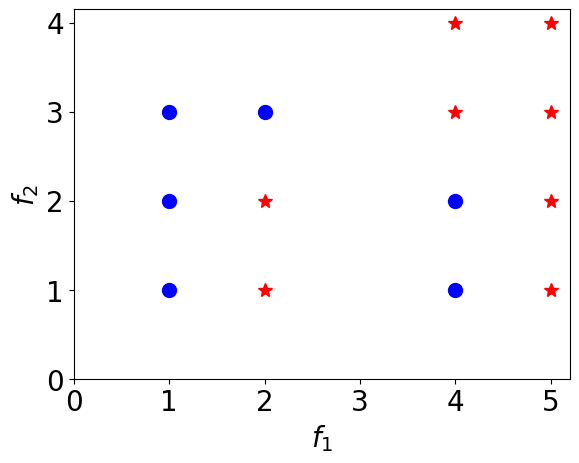

In [26]:
### PLot the dataset

import matplotlib.pyplot as plt
plt.plot(traindata[(trainlabel==1)[:,0]][:,0], traindata[(trainlabel==1)[:,0]][:,1],'*r', markersize=10)
plt.plot(traindata[(trainlabel==2)[:,0]][:,0], traindata[(trainlabel==2)[:,0]][:,1],'ob', markersize=10)
plt.xticks(np.arange(0,6,1),fontsize=20)
plt.yticks(np.arange(0,5,1), fontsize=20)
plt.xlabel('$f_1$', fontsize=20)
plt.ylabel('$f_2$', fontsize=20)
plt.show()

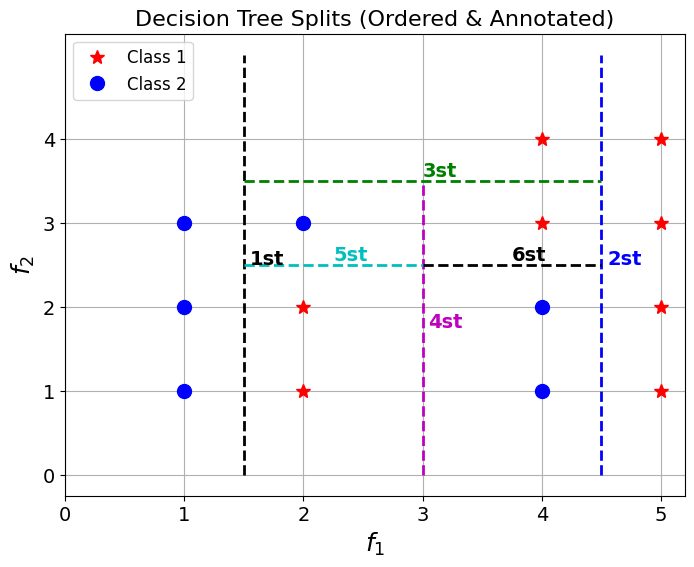

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, criterion="entropy")
clf.fit(data, label.ravel())

# Extract tree structure
thresholds = clf.tree_.threshold
features = clf.tree_.feature
left_children = clf.tree_.children_left
right_children = clf.tree_.children_right

# Filter out leaf nodes (-2 means it's a leaf)
valid_indices = np.where(thresholds != -2)[0]
valid_splits = thresholds[valid_indices]
split_features = features[valid_indices]

# Track split regions
split_regions = {(0, np.inf, 0, np.inf)}  # (x_min, x_max, y_min, y_max)

# Function to update region boundaries
def update_regions(parent_bounds, feature, split_value, is_left):
    x_min, x_max, y_min, y_max = parent_bounds
    if feature == 0:  # Splitting on f1 (vertical)
        return (x_min, split_value, y_min, y_max) if is_left else (split_value, x_max, y_min, y_max)
    else:  # Splitting on f2 (horizontal)
        return (x_min, x_max, y_min, split_value) if is_left else (x_min, x_max, split_value, y_max)

# Initialize region tracking
node_regions = {0: (0, 6, 0, 5)}  # Start with full axis range

# Plot data points
plt.figure(figsize=(8, 6))
plt.plot(data[label.ravel() == 1][:, 0], data[label.ravel() == 1][:, 1], '*r', markersize=10, label="Class 1")
plt.plot(data[label.ravel() == 2][:, 0], data[label.ravel() == 2][:, 1], 'ob', markersize=10, label="Class 2")

# Define colors for different levels of the tree
colors = ['k', 'b', 'g', 'm', 'c']  # Cycle through colors

# Traverse the tree and plot constrained splits with annotations
for i, (node, split, feature) in enumerate(zip(valid_indices, valid_splits, split_features)):
    color = colors[i % len(colors)]  # Cycle through colors

    # Get the parent node bounds
    parent_bounds = node_regions[node]
    x_min, x_max, y_min, y_max = parent_bounds

    # Determine label position
    if feature == 0:  # Split on f1 (vertical line)
        plt.plot([split, split], [y_min, y_max], color=color, linestyle='--', linewidth=2)
        plt.text(split + 0.05, (y_min + y_max) / 2, f'{i+1}st', fontsize=14, color=color, fontweight='bold')
    elif feature == 1:  # Split on f2 (horizontal line)
        plt.plot([x_min, x_max], [split, split], color=color, linestyle='--', linewidth=2)
        plt.text((x_min + x_max) / 2, split + 0.05, f'{i+1}st', fontsize=14, color=color, fontweight='bold')

    # Assign new regions to child nodes
    left_child, right_child = left_children[node], right_children[node]
    if left_child != -1:
        node_regions[left_child] = update_regions(parent_bounds, feature, split, is_left=True)
    if right_child != -1:
        node_regions[right_child] = update_regions(parent_bounds, feature, split, is_left=False)

# Axis settings
plt.xticks(np.arange(0, 6, 1), fontsize=14)
plt.yticks(np.arange(0, 5, 1), fontsize=14)
plt.xlabel(r'$f_1$', fontsize=18)
plt.ylabel(r'$f_2$', fontsize=18)
plt.legend(fontsize=12)
plt.title("Decision Tree Splits (Ordered & Annotated)", fontsize=16)
plt.grid(True)
plt.show()


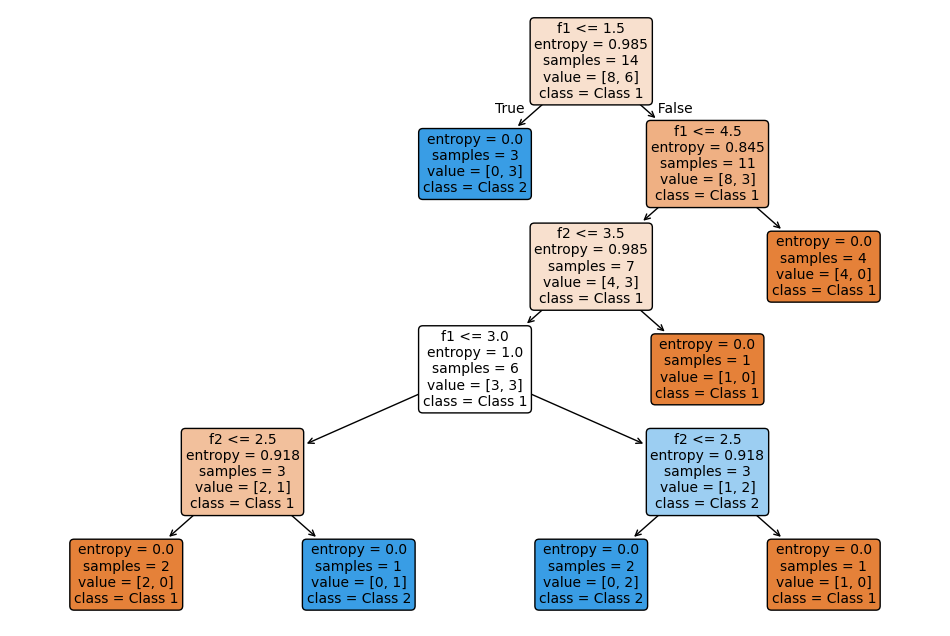

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Increase figure size
plot_tree(clf, feature_names=['f1', 'f2'], class_names=['Class 1', 'Class 2'], filled=True, fontsize=10, rounded=True)
plt.show()

Let's create a simple Decision Tree example with a small dataset and test different values of min_samples_split and min_samples_leaf to see how they affect the tree structure.





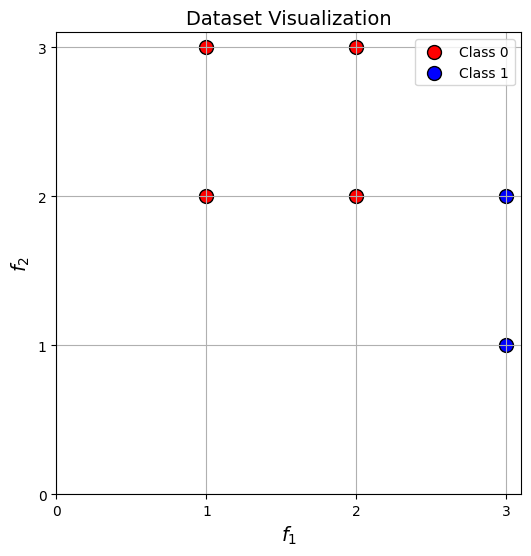

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Define small dataset
X = np.array([[1, 2], [1, 3], [2, 2], [2, 3], [3, 1], [3, 2]])
y = np.array([0, 0, 0, 0, 1, 1])  # Binary classification (0 or 1)

# Scatter plot of the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label="Class 0", s=100, edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label="Class 1", s=100, edgecolors='k')
plt.xticks(np.arange(0, 4, 1))
plt.yticks(np.arange(0, 4, 1))
plt.xlabel("$f_1$", fontsize=14)
plt.ylabel("$f_2$", fontsize=14)
plt.title("Dataset Visualization", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Train Decision Trees with different constraints
clf_split = DecisionTreeClassifier(min_samples_split=5, criterion="entropy", random_state=42)
clf_leaf = DecisionTreeClassifier(min_samples_leaf=5, criterion="entropy", random_state=42)

clf_split.fit(X, y)
clf_leaf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=42)

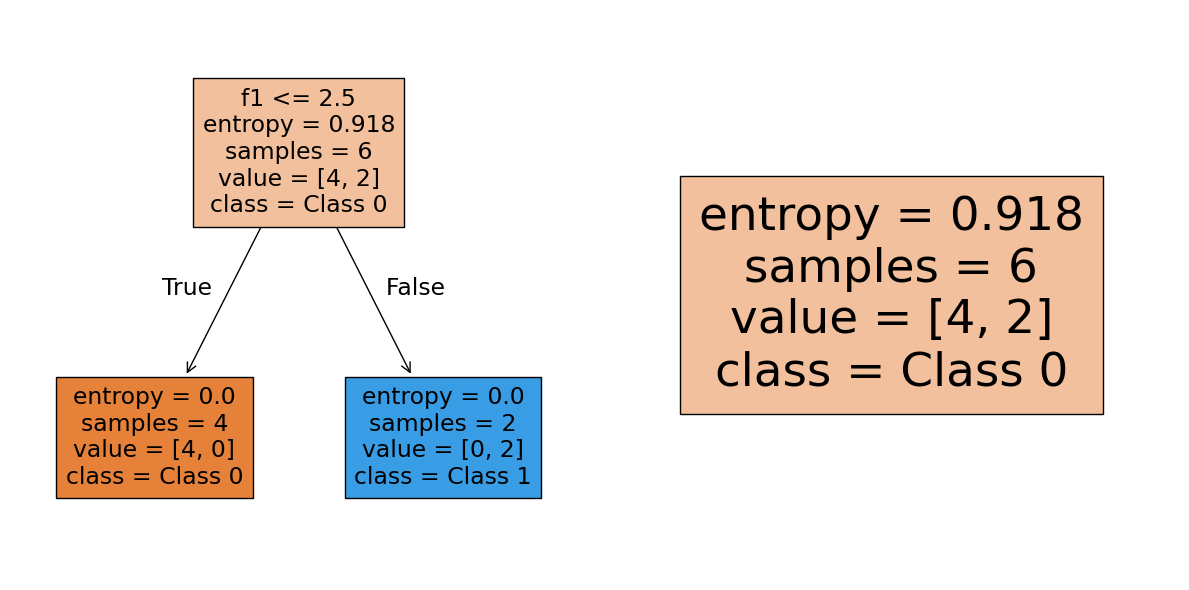

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Decision Tree for min_samples_split=5
axes[0].set_title("min_samples_split=5")
plot_tree(clf_split, feature_names=['f1', 'f2'], class_names=['Class 0', 'Class 1'], filled=True, ax=axes[0])

# Plot Decision Tree for min_samples_leaf=5
axes[1].set_title("min_samples_leaf=5")
plot_tree(clf_leaf, feature_names=['f1', 'f2'], class_names=['Class 0', 'Class 1'], filled=True, ax=axes[1])

plt.tight_layout()
plt.show()
